# Greeks Sensitivity Analysis using Finite Differences

In this notebook, we compute key sensitivities (Greeks) for European options using the **central finite difference** method. These Greeks help us measure how sensitive the option price is to various parameters:
- **Delta**: sensitivity to the underlying asset price (S)
- **Gamma**: second-order sensitivity to the asset price
- **Vega**: sensitivity to volatility (σ)

We use our previously implemented Black-Scholes model as the base pricing engine.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

sys.path.append(os.path.abspath("../../"))

from pricing.bsm import black_scholes_price

In [5]:
# Finite Difference Greek Engine

def compute_greeks(S0, K, T, r, sigma, option_type='call', h=1e-2):
    # Delta
    price_up = black_scholes_price(S0 + h, K, T, r, sigma, option_type)
    price_down = black_scholes_price(S0 - h, K, T, r, sigma, option_type)
    delta = (price_up - price_down) / (2 * h)

    # Gamma
    price = black_scholes_price(S0, K, T, r, sigma, option_type)
    gamma = (price_up - 2 * price + price_down) / (h ** 2)

    # Vega
    price_sigma_up = black_scholes_price(S0, K, T, r, sigma + h, option_type)
    price_sigma_down = black_scholes_price(S0, K, T, r, sigma - h, option_type)
    vega = (price_sigma_up - price_sigma_down) / (2 * h)

    return delta, gamma, vega

In [6]:
# Parameters
S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
option_type = 'call'

delta, gamma, vega = compute_greeks(S0, K, T, r, sigma, option_type = 'call')

print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Vega:  {vega:.4f}")

Delta: 0.6368
Gamma: 0.0188
Vega:  37.5210


### Observations:
- **Delta** is positive for call options and increases with S.
- **Gamma** is highest near-the-money and decreases away from the strike.
- **Vega** shows the sensitivity of price to small changes in volatility and is also highest near-the-money.

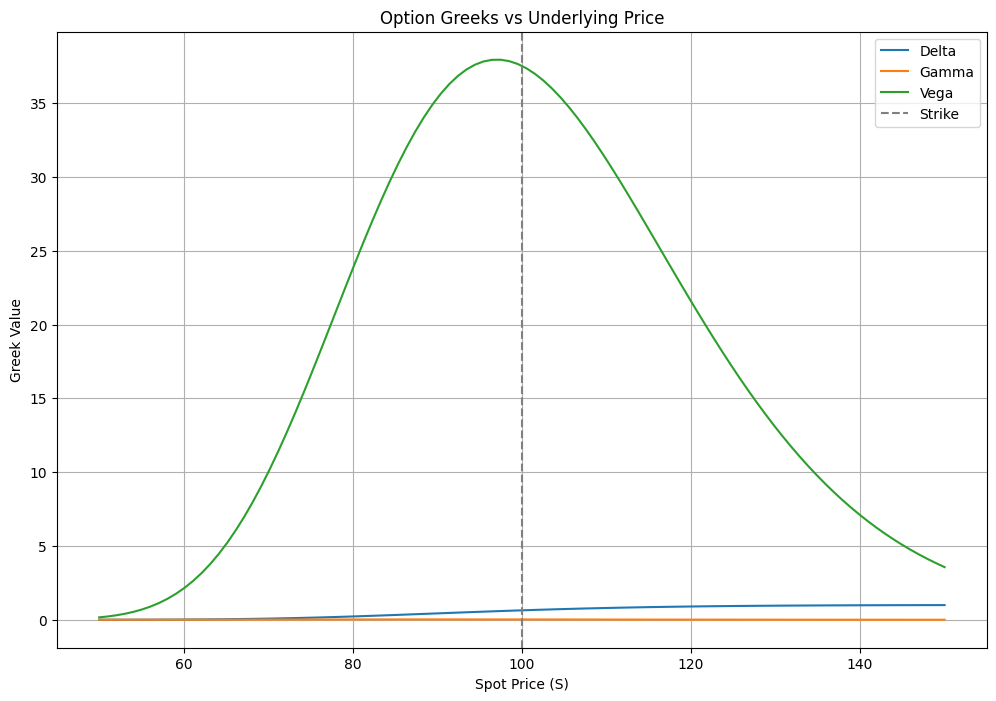

In [9]:
S_range = np.linspace(50, 150, 100)
deltas, gammas, vegas = [], [], []

for S in S_range:
    d, g, v = compute_greeks(S, K, T, r, sigma, option_type)
    deltas.append(d)
    gammas.append(g)
    vegas.append(v)

plt.figure(figsize=(12, 8))
plt.plot(S_range, deltas, label='Delta')
plt.plot(S_range, gammas, label='Gamma')
plt.plot(S_range, vegas, label='Vega')
plt.axvline(K, color='gray', linestyle='--', label='Strike')
plt.title("Option Greeks vs Underlying Price")
plt.xlabel("Spot Price (S)")
plt.ylabel("Greek Value")
plt.legend()
plt.grid(True)
plt.show()

## Summary

This notebook implemented the **finite difference method** to compute the primary Greeks of a European option. We also visualized how these sensitivities evolve with changes in the underlying asset.